# Module IV Problem Set


Jennifer Souvannasing<BR>
DTA 447 Data Science<BR>
Professor Chen
 

## Part A: Weather Underground

### <B>Question 1</B><BR>
Load the weather-underground dataset with Pandas and briefly explore it.

In [36]:
# Importing the modules for this assignment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

In [10]:
# Importing the file for Part A of the assignment

weather = pd.read_csv('C:/Users/vitto/Documents/DTA 447/Week 8/weather-underground.csv')

In [11]:
# Verifying that the .csv file imported correctly

print(weather)

          date  maxpressurem  maxdewptm  maxpressurei  maxdewpti  \
0   2011-05-01          1026          6         30.31         42   
1   2011-05-02          1026         10         30.31         50   
2   2011-05-03          1021         15         30.14         59   
3   2011-05-04          1017         14         30.03         57   
4   2011-05-05          1016          4         30.01         39   
5   2011-05-06          1015          8         29.99         46   
6   2011-05-07          1011          8         29.87         47   
7   2011-05-08          1014          9         29.96         48   
8   2011-05-09          1016          9         30.01         49   
9   2011-05-10          1017          8         30.05         47   
10  2011-05-11          1019         10         30.09         50   
11  2011-05-12          1019         11         30.10         51   
12  2011-05-13          1017         11         30.03         51   
13  2011-05-14          1012         13         

### <B>Question 2</B><BR>
Use Matplotlib or Seaborn to create a line plot with the x-axis bing the date and y-axis being "Pressure". There should be three lines (curves) in the plot: One each for maxpressurei, minpressurei, and meanpressurei. An acceptable plot should be similar to the following (See chart in the assignment page).

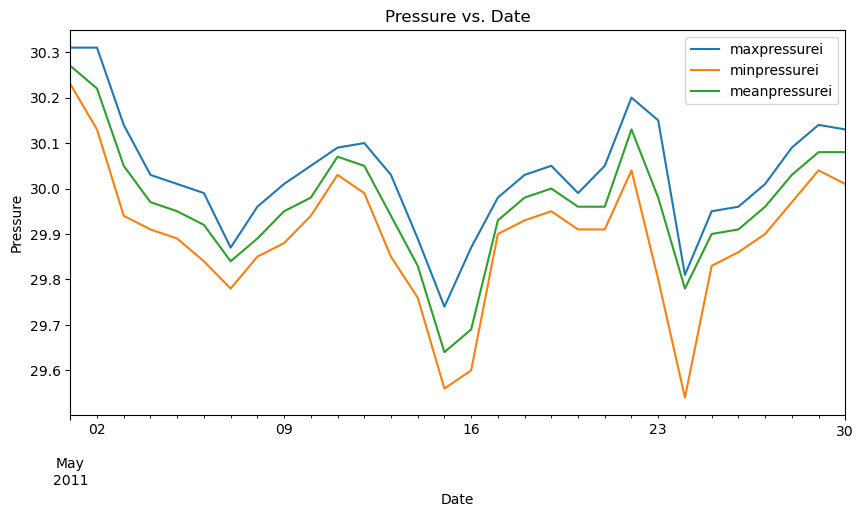

In [12]:
# Create a new DataFrame with just the date and pressure columns
pressure_data = weather[['date', 'maxpressurei', 'minpressurei', 'meanpressurei']]

# Set the date column as the index of the DataFrame
pressure_data.set_index('date', inplace=True)

# Convert the index to a datetime object
pressure_data.index = pd.to_datetime(pressure_data.index)

# Create a line plot with three curves for maxpressurei, minpressurei, and meanpressurei
pressure_data.plot(figsize=(10,5))

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Pressure vs. Date')
plt.show()

### <B>Question 3</B><BR>
Interpret the plot you made in words. Point out key features of your plot and explain.

The plot shows three curves for maxpressurei, minpressurei, and meanpressurei over a span of time in May 2011. The x-axis represents the date, and the y-axis represents the pressure.

Looking at the plot, we can see that the pressure generally fluctuates over time, with peaks and valleys corresponding to changes in atmospheric conditions. The three curves show the upper and lower bounds of the pressure range (maxpressurei and minpressurei), as well as the mean pressure value (meanpressurei) over the indicated span of time. The plot shows three lines for maxpressurei, minpressurei, and meanpressurei over time. We can see that all three lines follow a similar pattern of changes over time. There are no significant differences between the maxpressurei and minpressurei lines, suggesting that the pressure range is relatively consistent over time. The meanpressurei line provides a good overall representation of the pressure data, showing us the average pressure value over time.

Overall, the plot provides a useful visualization of the pressure data over time, allowing us to see trends and patterns in the data that may not be immediately apparent when looking at the raw numbers alone. By tracking changes in pressure over time, we may be able to gain insights into changes in weather patterns or other atmospheric conditions, and use this information to make predictions or forecasts about future weather events.

## Part B: COVID-19 Confirmed Cases by Country

### <B>Question 4</B><BR>
Load the confirmed COVID-19 cases dataset with Pandas and briefly explore it.

In [13]:
# Importing the file for Part B of the assignment

cases = pd.read_csv('C:/Users/vitto/Documents/DTA 447/Week 8/covid_confirmed_cases.csv')

In [15]:
# Testing that the file was imported correctly.

print(cases)

   Unnamed: 0  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0           0       Australia        0        0        0        0        4   
1           1           China      548      643      920     1406     2075   
2           2           Italy        0        0        0        0        0   
3           3              US        1        1        2        2        5   
4           4  United Kingdom        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...     2/6/23     2/7/23     2/8/23     2/9/23  \
0        5        5        6  ...   11312904   11312904   11312904   11327900   
1     2877     5509     6087  ...    4903509    4903513    4903515    4903516   
2        0        0        0  ...   25488166   25488166   25488166   25488166   
3        5        5        6  ...  102626931  102672142  102755381  102837101   
4        0        0        0  ...   24526807   24526807   24526866   24549097   

     2/10/23    2/11/23    2/12/23    2/13/2

### <B>Question 5</B><BR>
Use Matplotlib or Seaborn to make the following trend plot stratified by Country/Region. An acceptable plot is shown below (see chart in the assignment).

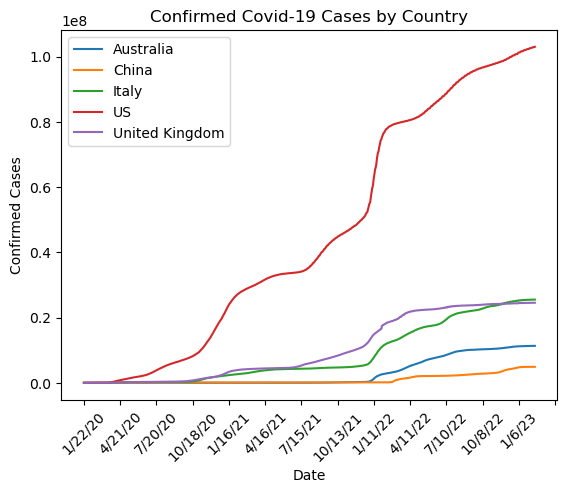

In [41]:
# create an empty list to store the new data
new_data = []

# loop through each row of the original DataFrame
for index, row in cases.iterrows():
    # get the country/region name
    country = row['Country/Region']
    
    # loop through each date column and value
    for date, confirmed_cases in row.items():
        # skip the country/region column
        if date == 'Country/Region' or date == 'Unnamed: 0':
            continue
            
        # create a new row with the country/region, date, and confirmed cases
        new_row = {'Country/Region': country, 'date': date, 'confirmed_cases': confirmed_cases}
        
        # add the new row to the list
        new_data.append(new_row)

# create a new DataFrame with the new data
covid_cases_long = pd.DataFrame(new_data)

# create a list of unique countries
countries = covid_cases_long['Country/Region'].unique()

# loop through each country and plot the confirmed cases over time
for country in countries:
    data = covid_cases_long[covid_cases_long['Country/Region'] == country]
    plt.plot(data['date'], data['confirmed_cases'], label=country)
    plt.xticks(rotation=45)

# add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Covid-19 Cases by Country')

# add a legend to show which country each line represents
plt.legend()

# set the tick frequency to show every 90 days
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(90))

# show the plot
plt.show()

### <B>Question 6</B><BR>
Similar to Question 3, explain your findings in words.

According to the chart, it seems that the United States did not take decisive action in response to the Covid-19 outbreak. The number of cases in the country increased rapidly and did not show any signs of plateauing, unlike the other countries in the data set. This suggests that the United States did not implement measures such as lockdowns, which were adopted by other countries to curb the spread of the virus.

Based on my personal experience working in retail before and during the Covid-19 pandemic, I can attest to the fact that the store was noticeably busier than usual, and it seemed like people were more inclined to shop with their entire families during this time. Wearing masks was not enforced in my area, despite it being a local ordinance. I can surmise that this was the case in many areas of the country based on the data that was contained in the data file.